# TA Review, Jan 27

Agenda: Quick reminders of the following

 - Holding period return
 - Average bond returns compared to, say, stocks. Why invest?
 - Discussion of repo and its use for leverage or shorting
 - Term spread behavior and preview of the Expectations Hypothesis

## 1. Holding Period Returns

Let's start with a review of notation and let's make sure we understand the difference between yields and returns.

Recall that a yield-to-maturity is the discount rate at which the present discounted value of all cash flows of the bond is equal to the price. If the bond is held to maturity, this is the annualized return that **would be** realized. The important thing to note here is that this is the return that would be realized only if it is held to maturity.


### 1.1 Definitions and interpreation
Consider zero-coupon bonds with face values of 1, for simplicity.

The yield to maturity $Y_{nt}$ is the number that makes the price $P_{nt}$ equal to the present value of the discounted future cashflows. In the case of zero-coupon bonds, this is very simple:
$$
P_{nt} = \frac{1}{(1+Y_{nt})^n}.
$$
In logs, this is
$$
p_{nt} = -n y_{nt},
$$
and note that
$$
y_{nt} = - \frac 1 n p_{nt}.
$$
Define the term spread as
$$
s_{nt} = y_{nt} - y_{1,t}.
$$
The holding period return is then defined by
$$
1 + R_{n,t+1} = \frac{P_{n-1, t+1}}{P_{nt}} = \frac{(1+Y_{nt})^n}{(1+Y_{n-1,t+1})^{n-1}}.
$$
In logs, this is
$$
\begin{align*}
r_{n,t+1} 
  &= p_{n-1,t+1} - p_{nt} \\
  &= y_{nt} - (n-1) (y_{n-1,t+1} - y_{nt}) \\
  &= y_{nt} - (n-1)(y_{n,t+1}-y_{nt}) + (n-1)(y_{n,t+1} - y_{n-1,t+1}).
\end{align*}
$$

 - How did we get from the first equality to the second equality?
 - What does this second formula imply? That is, under what conditions will the holding period return be high and under what conditions will it be low?
 - Can you lose money on a risk-free bond?
 - What are the intepretation of the decomposition in the third equality?
 - What problems might come up if you compare the yield of one bond with the yield of another? Is it an "apples-to-apples" comparison? What might you want to compare average returns instead?
 - What problems are there with comparing average holding period returns of one bond with another? 

Some answers:

 - Note the second term is the pure effect of a shift in the yield curve whereas the third term captures movement along the yield curve ("riding the yield curve").
 - If we look at the average holding period return on a, say, 10 year note, the associated thought experiment is buying a 10 year note today, selling it next period, and then immediately buying a fresh 10 year note.

### 1.2 Average returns

The following table comes from Campbell (2018), *Financial Decisions and Markets*, Chapter 8.

![table_8_1.png](./table_8_1.png)

Now, for comparision, the average return on the S\&P 500 over approximately the same time period has been around 11.88\% while the long-term average of a 3-month Treasury bill is around 4\%.

- How do Treasury returns compare to stock returns?
- Given the disparity in the average returns between Treasuries and stocks, if you're a hedge fund willing to take on extra risk, why would you ever invest in Treasuries?

## 2. Repurchase agreements

The following figure is from Veronesi (2009), *Fixed Income Securities*

![figure_1_4.png](./figure_1_4.png)

Note that interest on the repo loan is calculated as follows:
$$
\text{Repo interest} = \frac{n}{360} \times \text{Repo rate} \times (P_t - haircut)
$$
If the trader seeks maximum leverage, the return is
$$
\text{Return on capital} = \frac{P_T - P_t - \text{Repo interest}}{\text{Haircut}}.
$$

## 2. Review Yield Curve Facts

Now let's review some basic statistics about the yield curve. I'll start by reviewing the yield curve and showcase one particular data source. 

### 2.1 Gürkaynak, Sack, Wright Yield Curve Estimates

As we've discussed, the spot curve (or yield curve) is an asset pricing object that allows us to put a fair price on all Treasury securities. Moreoever, since we assume that US Treasury securities are risk-free, this yield curve allows us to price all risk-free securities. Thus, it is a fundamental building block of asset pricing. Because it can be tedious to estimate this ourselves, it is useful to find somewhat canonical data source that estimates it for us. This can be from Bloomberg or somewhere else. One popular source for academic researchers are the estimates of Gürkaynak, Sack, Wright (2006) and Gürkaynak, Sack, Wright (2008) from the Federal Reserve Board.

Data on the spot curve, forward rates, etc can be found for nominal US Treasuries as well as TIPS. See here:

1) The U.S. Treasury Yield Curve: 1961 to the Present
  - Info: https://www.federalreserve.gov/pubs/feds/2006/200628/200628abs.html
  - Data: https://www.federalreserve.gov/data/yield-curve-tables/feds200628.csv
  - HTML Table: https://www.federalreserve.gov/data/yield-curve-tables/feds200628_1.html

2)  The TIPS Yield Curve and Inflation Compensation
  - Info: https://www.federalreserve.gov/pubs/feds/2008/200805/200805abs.html
  - Data: https://www.federalreserve.gov/data/yield-curve-tables/feds200805.csv
  - HTML Table: https://www.federalreserve.gov/data/yield-curve-tables/feds200805_1.html


Below I've included code to load and format the data. See the file `load_treasury_yields.py`


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from pathlib import Path
import sys
sys.path.insert(0, '../cmds')
import load_treasury_yields

DATA_DIR = Path('../data/')

**An aside about coding style:** 
Like I discussed in my last TA session, it's very important to get into the habit of writing good, reusable code. Good code is reusable code. One good habit is to separate out the code that loads your data. Some particular data set will usually be reused many times in different projects as well as in different places in the same project. Thus, it seems like a good idea to write the code that loads and formats that data in a separate file that can be resused multiple times in the same project. I've done that here. The result is that I can load the zero-coupon yield curve in a single line of code and I can focus on the analysis rather than the data cleaning in this file. Take a look at the separate Python file to get an ideas on coding style. You might even see ways to improve what I've done here.

In [2]:
nom_yields = load_treasury_yields.load_nominal_yields(dirpath=DATA_DIR)

In [3]:
nom_yields.head()

,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,SVENF03,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
Date,,,,,,,,,,,,,,,,,,,,,
1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,3.9149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,3.9763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,3.9811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,4.0035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,3.9840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


 - How would I use the formulas above to calculate the holding period returns using this data?

### 2.2 Analyze Yield Curve Patterns

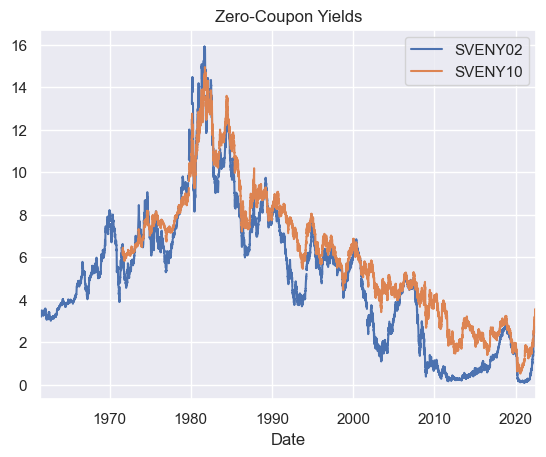

In [4]:
nom_yields[['SVENY02', 'SVENY10']].plot()
plt.title('Zero-Coupon Yields');

- What patterns do we see above?
- What do the yield curve levels look like in the cross section and over time?
- Any theories for the patterns you see?

In [5]:
df = pd.DataFrame(index=nom_yields.index.copy())
df['ten_two_term_spread'] = nom_yields['SVENY10'] - nom_yields['SVENY02']

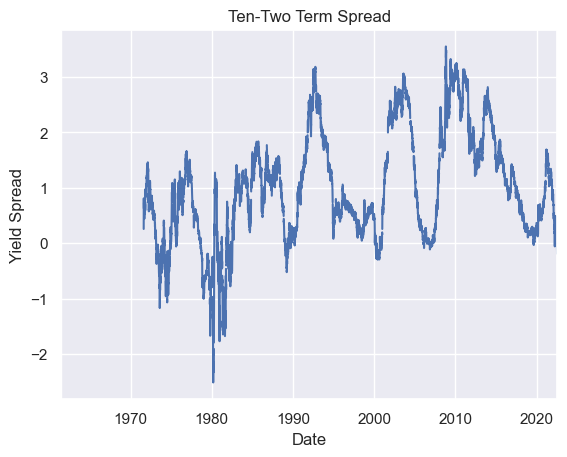

In [6]:
df['ten_two_term_spread'].plot()
plt.ylabel("Yield Spread")
plt.title('Ten-Two Term Spread');

Now, let's Zoom in on the difference between the yields.